# Inception - Going Deeper with Convolutions

Original Paper @ https://arxiv.org/abs/1409.4842

Powered and Inspired by - ***“we need to go deeper”***

The Inception network is considered an important milestone in the era of deep learning and Convolutional Neural Networks. The original GoogLeNet or the InceptionV1 is a 22-layers-deep network. The key innovation of the GoogLeNet model is the introduction of the **Inception Block**. It is a block of parallel convolutional layers with filters of sizes **1×1, 3×3, 5×5** and a **3×3 max pooling layer**. The results of the parallel convolutions are then concatenated to conplete the inception block. The inception blocks result in a powerful architectural unit that allows the model to learn parallel filters of various sizes, allowing learning at multiple scales.

The authors use the word ***“deep”*** in two different meanings: 
- Introduce a new level of organization in the form of the “Inception module”.
- Increased network depth.

However, increase in network depth has its own problems -

- Increase in the network depth makes the models very hard to train due to the vanishing and exploding gradient problem. The gradients become unstable and tend to vanish towards the deeper layers eventually making it hard to pass gradient updates through the entire network. 
- Also, deeper networks are prone to overfitting.  
- Increase in network depth, dramatically increases the requirement of computational resources.

## Naive Approach

**GoogLeNet** came up with the idea of employing kernels with varying sizes operate at the same level. Multiple kernels of sizes **1×1, 3×3, 5×5** convolve the input at the same time. The network essentially would get a bit **"wider"** with parallel convolutions rather than deeper. The image below shows the naive implementation of the inception module.

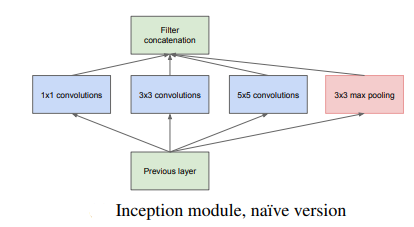

**Image Source:** (Szegedy et al., 2014)

The naive approach howevre, is computationally expensive. Suppose we need to convolve **28 X 28 X 192** input feature maps with **5 X 5 X 32** filters. This will result in **120.422 Million** operations.

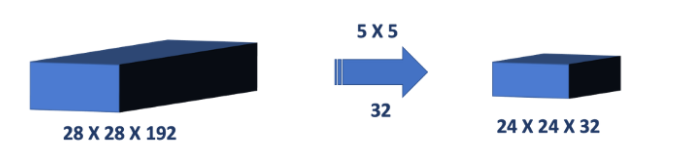

**Image Source:** [1x1 Colvolutions](https://medium.com/analytics-vidhya/talented-mr-1x1-comprehensive-look-at-1x1-convolution-in-deep-learning-f6b355825578)

- **Computation cost = ((28 x 28 x 5 x 5) x 192) x 32 = 120.422 Million**

A total of **(28 x 28 x 5 x 5)** operations along 192 channels for each of the 32 filters. Such huge amount of computations make the network notoriously hard to train. 

## Dimensionality Reduction

To mitigate the computation cost of the naive inception architecture, GoogLeNet introduced a way of reducing the network parameters and reduce the dimensions. The dimensional reduction mechanism is the introduction of **1x1** convolutions prior to the larger **3x3** and **5x5** convolutional operations. As mentioned in the original paper -

"*However, in our setting, 1 × 1 convolutions have dual purpose: most critically, they are used mainly as dimension reduction modules to remove computational bottlenecks, that would otherwise limit the size of our networks. This allows for not just increasing the depth, but also the width of our networks without significant performance penalty.*"

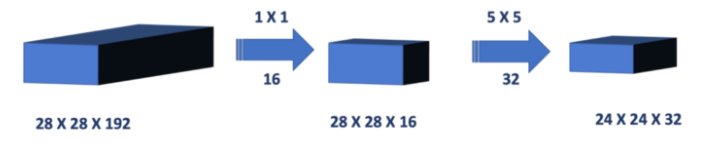

**Image Source:** [1x1 Colvolutions](https://medium.com/analytics-vidhya/talented-mr-1x1-comprehensive-look-at-1x1-convolution-in-deep-learning-f6b355825578)

The dimension reduction approach is less computationally expensive:
- 1x1 computation operations = ((28 x 28 x 1 x 1) x 192) x 16 = 2.4 Million
- 5x5 computation operations = ((28 x 28 x 5 x 5) x 16) x 32 = 10 Million
- Total computation cost is **12.4 Million**

Thus, by adding 1X1 comvolution layer before the larger 5X5 comvolution, while keeping the height and width of the feature map same, the number of operations reduced by a factor of 10. This will make the model more efficient and also reduce the computational requirements.

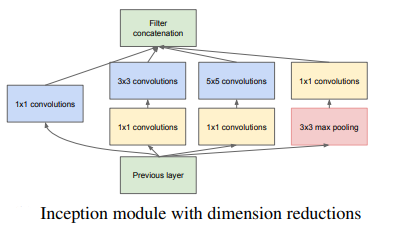

**Image Source:** (Szegedy et al., 2014)

## 1x1 Convolutions

First introduced in the paper titled - [Network In Network](https://arxiv.org/abs/1312.4400) by (Lin, Chen and Yan, 2013), to enhance model discriminability for local patches within the receptive field. The conventional convolutions use linear filters followed by a nonlinear activation function to scan the input. Representations that achieve good abstraction are generally highly nonlinear functions of the input data. Instead, the network in network approach builds micro neural networks with more complex structures to abstract the data within the receptive fields. It would be beneficial to do a better abstraction on each local patch, before combining them into higher level concepts. The authors use 1X1 Convolution layer was used for **Cross Channel Down sampling** or **Cross Channel Pooling**. 1X1 Conv was used to reduce the number of channels while introducing non-linearity.

In the Inception blocks, *1×1 convolutions are used to compute reductions before the expensive 3×3 and 5×5 convolutions. Besides being used as reductions, they also include the use of rectified linear activation which makes them dual-purpose.*

## Inception Architectural Discussions

*The main idea of the Inception architecture is based on finding out how an optimal local sparse structure in a convolutional vision network can be approximated and covered by readily available dense components.*

The work of Arora et al. suggests a layer-by layer construction and analysis of the correlation statistics of the last layer and cluster them into groups of units with high correlation. These clusters form the units of the next layer and are connected to the units in the previous layer. Each unit from the earlier layer corresponds to some region of the input image and these units are grouped into filter banks. In the lower layers closer to the input, the correlated units would concentrate in local regions. This means, there would be a lot of clusters concentrated in a single region which can be covered by a layer of 1×1 convolutions in the next layer, as suggested in the [Network In Network](https://arxiv.org/abs/1312.4400) by (Lin, Chen and Yan, 2013) approach.

Additionally, since pooling operations have been essential for the success in current state of the art convolutional
networks, an alternative parallel pooling path is added the inception blocks.

The Inception modules are stacked on top of each other, their output correlation statistics vary and their spatial concentration is expected to decrease suggesting that the ratio of 3×3 and 5×5 convolutions should increase as we move towards the higher layers in the network. However, considering the naive implementation, as these 3x3 and 5×5 convolutions are added, can make the network very expensive with a large number of filters. The addition of pooling units where the number of output filters equals to the number of filters in the previous stage, further increasing the complexity. 
The concatenation of the outputs of all the layers would increase the number of parameters and complexity which could even blow up the computation during training. This limits the naive approach discussed above and asks for the netowrk to be more computationally efficient.

To counter the above problem, the authors propose the idea of **applying dimensionality and projections at certain points in the netowrk where the computational requirements would tend to increase too much**. The reduction computations are based on embeddings: even low dimensional embeddings could contain a lot of information about a relatively large image patch. However, embeddings represent information in a dense, compressed form and compressed information would make the model harder to train. This is indicative of keeping the representation as sparse as possible and compress the signals only whenever they all need to be aggregated together. That is, **1×1 convolutions are used to compute reductions before the expensive 3×3 and 5×5 convolutions**. The reduction  achieved by applying the 1x1 convolutions is seen in the Dimensionality Reduction section above.

### Benifits of the Architecture:

- It allows for increasing the number of units at each stage significantly without an uncontrolled blow-up in computational complexity.

- The use of dimension reduction allows for shielding the large number of input filters of the last stage to the next layer, reducing their dimension before convolving over them with a large patch size. 

- This design allows visual information to be processed at various scales parallely and then aggregated so that the next stage can abstract features from different scales simultaneously.

### Architectural Parameters and Design

The following table shows the optimal network parameters for various layers and the inception blocks used in the final model.

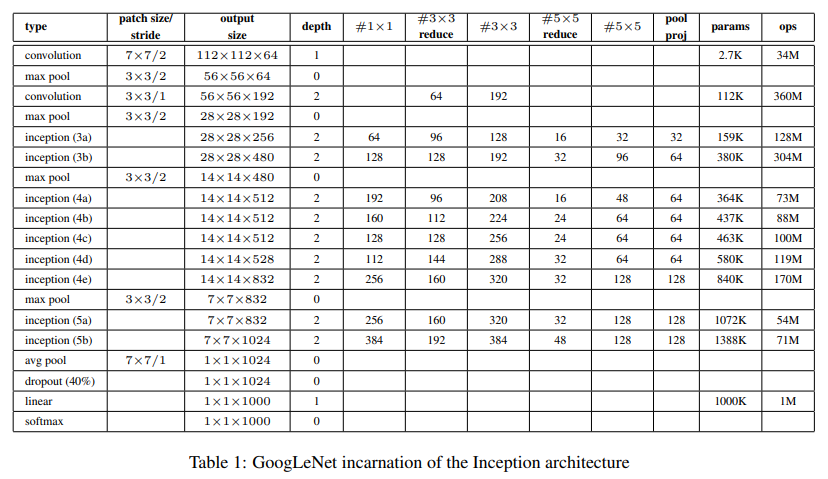

**Image Source:** (Szegedy et al., 2014)

#### Design

The complete model is designed as per the following layer configurations - 

- **Inception Modules**
    - 9 Inception modules
    
- **Global Average pooling**
    - GAP enables adapting and fine-tuning on the network easily since it retains the spatial structure of the feature maps and also, it is more native to the convolution structure by enforcing correspondences between feature maps and categories.
    - GAP has no parameters to optimize and thus overfitting is avoided at this layer. 
    
- **Auxilaries classifiers**

    - Two auxiliary classifiers take the form of smaller convolutional networks put on top of the output of the Inception (4a) and (4d) modules.
         - The auxiliary classifiers ensure only good gradients are propagated to the initial layers. 
         - It ensures that the intermediate features are good enough for the network to learn. 
         - It also tackles the vanishing gradient problem.
         - The auxiliary classifiers also provide additional regularization effect.
         - During training, their loss gets added to the total loss with a discount weight (the losses of the auxiliary classifiers were weighted by 0.3). During inference, they are discarded.
         
        - **Structure:**
            - Average pooling layer with 5×5 filter size and stride 3 resulting in an output size:
            - Output Size: 4×4×512 output for the (4a) stage, and 4×4×528 for the (4d) stage.
            - A 1×1 convolution with 128 filters for dimension reduction and rectified linear activation.
            - A fully connected layer with 1024 units and rectified linear activation.
            - A dropout layer with 70% ratio of dropped outputs.
            - A linear layer with softmax loss as the classifier (predicting the same 1000 classes as the main classifier, but removed at inference time).
            



### References

Szegedy, C. et al. (2014) ‘Going Deeper with Convolutions’. Available at: http://arxiv.org/abs/1409.4842 (Accessed: 25 August 2021).

Lin, M., Chen, Q. and Yan, S. (2013) ‘Network In Network’. Available at: http://arxiv.org/abs/1312.4400 (Accessed: 25 August 2021).

# Implementation

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [2]:
from Inception import InceptionV1
Inception = InceptionV1()

## Naive Inception Module

In [3]:
naive_incep_module = Inception.Naive_Inception_Module(f1x1=64, f3x3=128, f5x5=32)

# summarize model
naive_incep_module.summary()

Model: "Naive_Inception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
1x1_conv2d (Conv2D)             (None, 299, 299, 64) 256         input_1[0][0]                    
__________________________________________________________________________________________________
3x3_conv2d (Conv2D)             (None, 299, 299, 128 3584        input_1[0][0]                    
__________________________________________________________________________________________________
5x5_conv2d (Conv2D)             (None, 299, 299, 32) 2432        input_1[0][0]                    
____________________________________________________________________________________

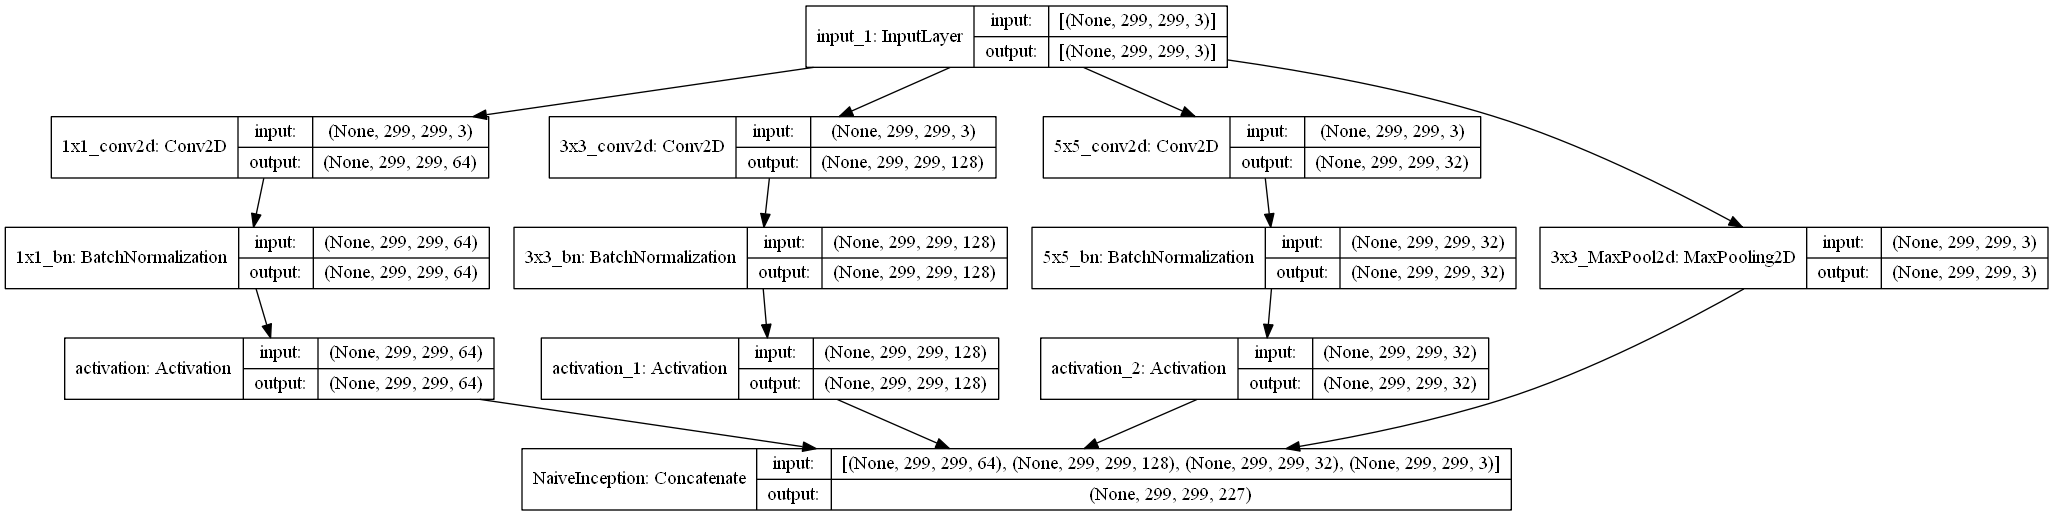

In [4]:
plot_model(naive_incep_module, show_shapes=True, to_file='naive_inception.png')

## Sample Inception Network

A slim version of the incception network with the parameters taken from the inception blocks 3(a) and 3(b) defined in the 
Table 1: GoogLeNet incarnation of the Inception architecture in the paper @ https://arxiv.org/pdf/1409.4842.pdf

In [5]:
sample_incep_module = Inception.Build_Sample_Inception_Network()

# summarize model
sample_incep_module.summary()

Model: "inception_network"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
inception1_3x3_reduce__conv2d ( (None, 299, 299, 96) 384         input_2[0][0]                    
__________________________________________________________________________________________________
inception1_5x5_reduce__conv2d ( (None, 299, 299, 16) 64          input_2[0][0]                    
__________________________________________________________________________________________________
inception1_3x3_reduce__bn (Batc (None, 299, 299, 96) 288         inception1_3x3_reduce__conv2d[0][
__________________________________________________________________________________

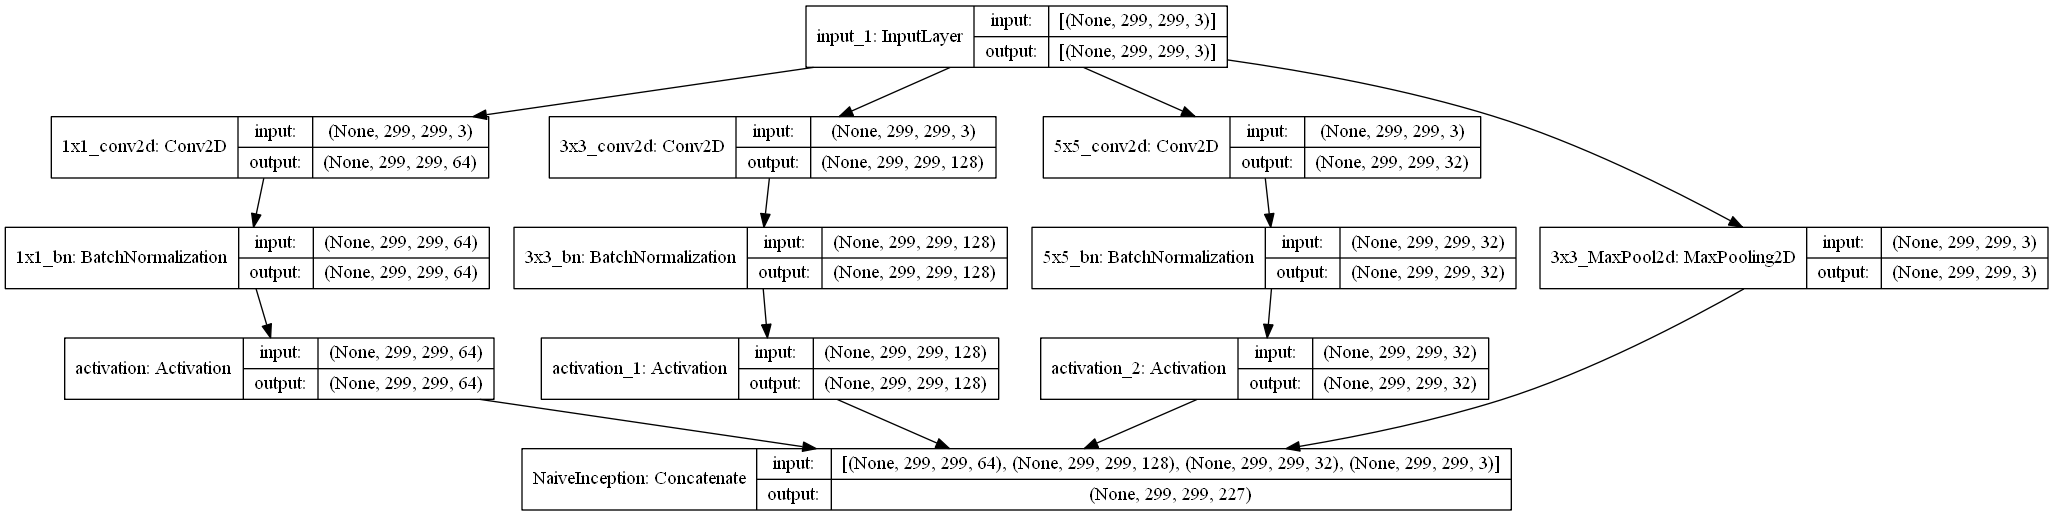

In [6]:
plot_model(naive_incep_module, show_shapes=True, to_file='sample_inception.png')

## GoogLeNet - Inception V1

In [7]:
GoogLeNetInceptionV1 = Inception.GoogLeNetInceptionV1(INPUT_SHAPE=(299, 299, 3), num_classes=2)

Model: "GoogLeNet_Inception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 150, 150, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 74, 74, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 64)   4160        max_pooling2d[0][0]              
________________________________________________________________________________

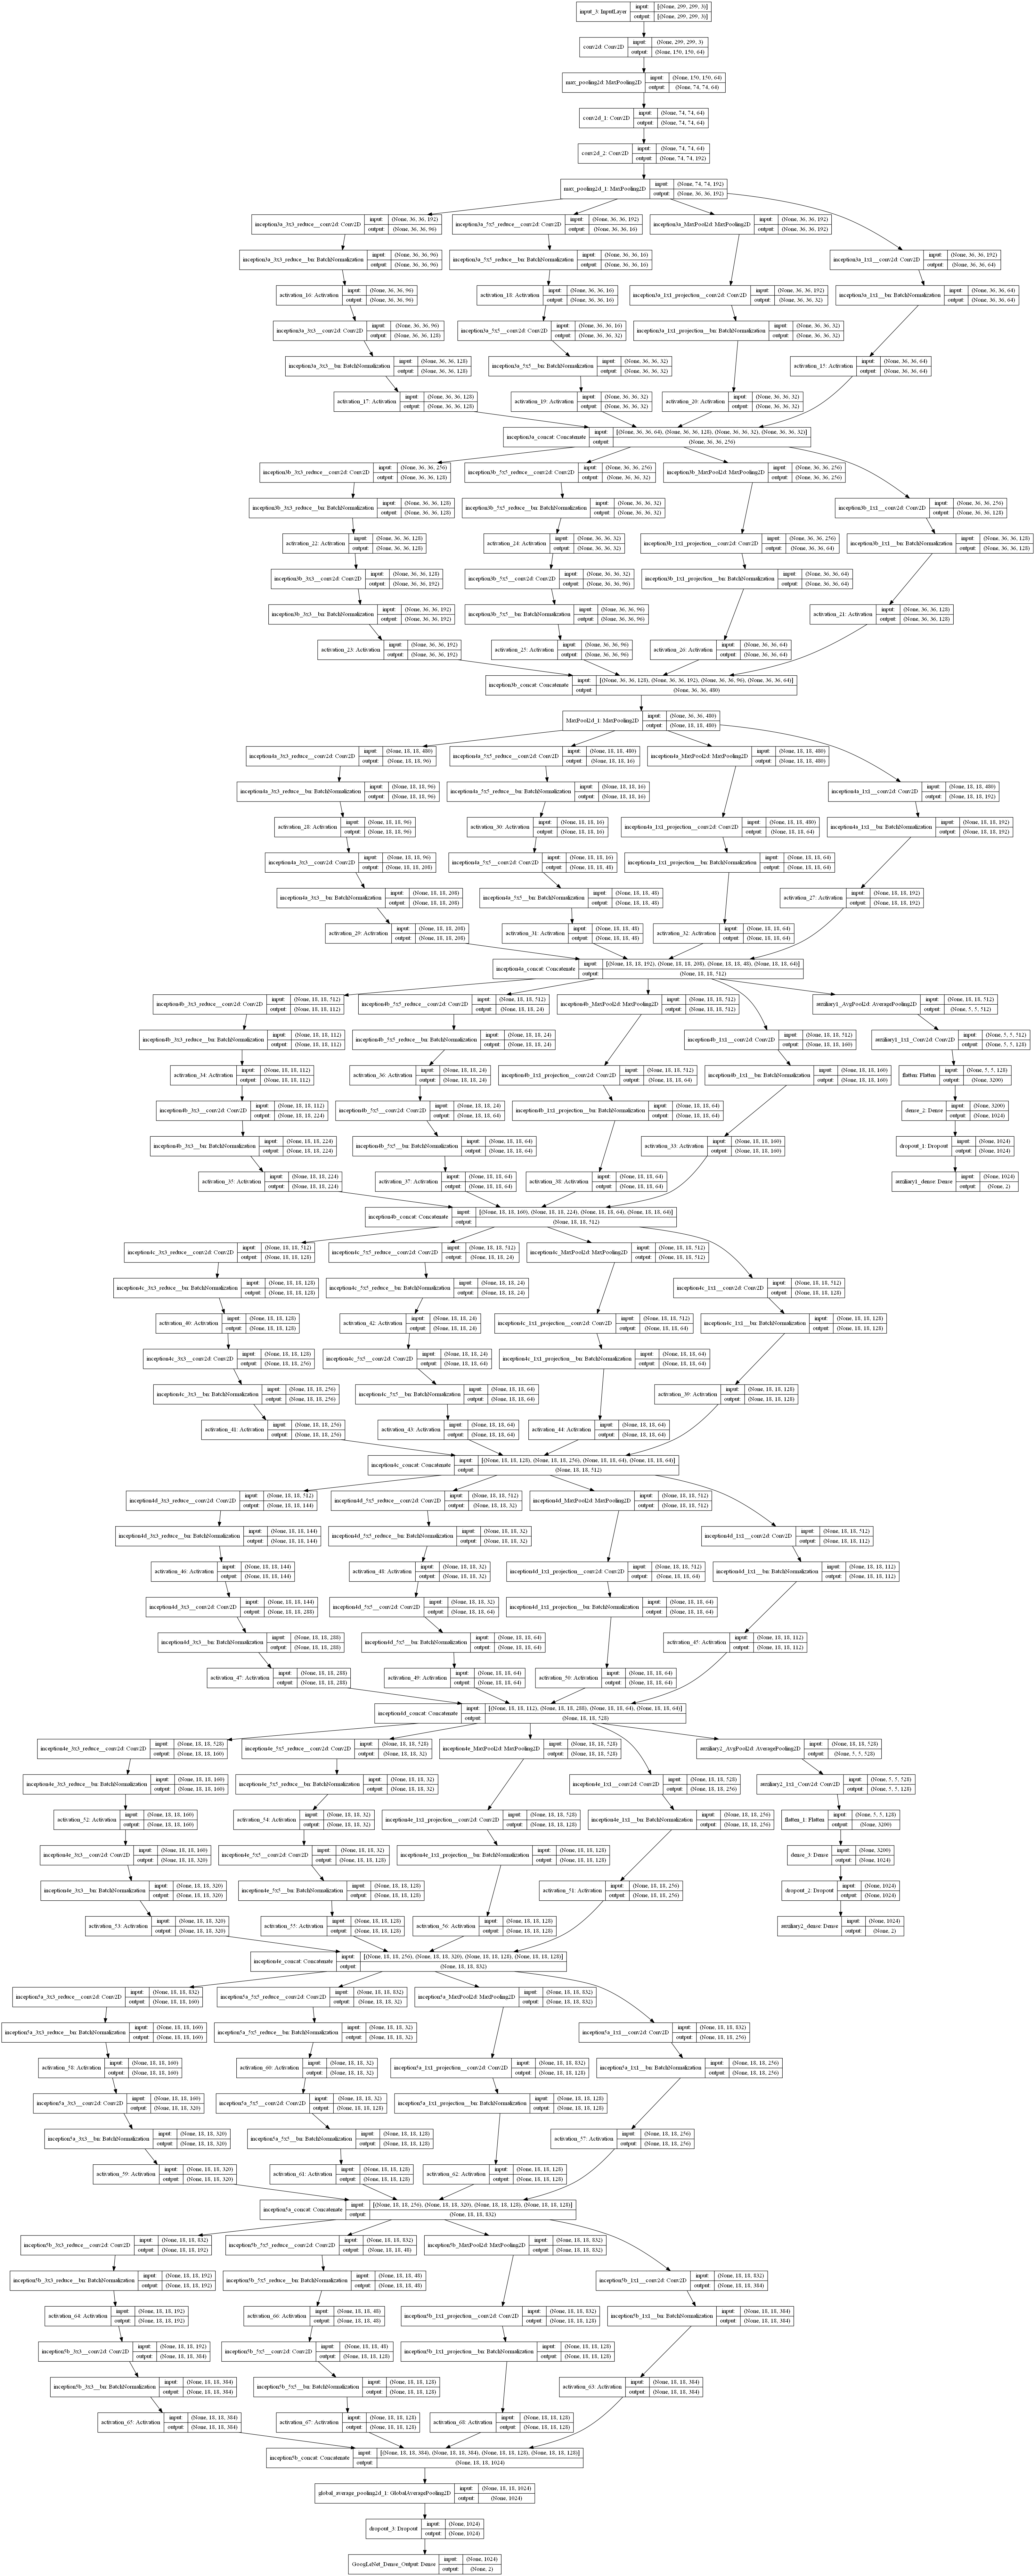

In [8]:
plot_model(GoogLeNetInceptionV1, show_shapes=True, to_file='GoogLeNetInceptionV1.png')

### GoogLeNet Inception Model Design 

